In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 12 19:30:13 2021

@author: Rahul Kumar
"""

#import needed library and modules
from sklearn.model_selection import train_test_split,cross_val_score,KFold,StratifiedKFold,cross_validate
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import svm,tree
from sklearn.metrics import make_scorer,f1_score,accuracy_score
from time import time
from sklearn.neural_network import MLPClassifier
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

def evaluate(y_pred,y_true,m_test):
    
    #Calculating the F1_score
    f1=f1_score(y_true,y_pred,average='weighted',zero_division=1)
    
    #Calculating the accuracy
    Accuracy=accuracy_score(y_true,y_pred)
    
    return {'f1_score': f1, 'Accuracy':Accuracy}
    

def NaiveBayes(x_train,x_test,y_train,y_test,NameOfDR):
    #Initializing the Naive bayes classifier object
    gnb=GaussianNB()

    #Finding the shape of test data
    (m_test,n_test)=x_test.shape
    
    scoring = {'accuracy' : make_scorer(accuracy_score), 
           'f1_score' : make_scorer(f1_score,average='weighted')}

    cv_scores=[]
    
    for j in range(2,12):
    #cross validation
        cv = KFold(n_splits=j, shuffle=True, random_state=0)
        cv_score=cross_validate(gnb,x_train,y_train,cv=cv,scoring=scoring)
        print("Accuracy and the F1-Score for the {} dataset and Naive Bayes Classifier (Fold {}): {} and {}".format(NameOfDR,j,cv_score['test_accuracy'].mean(),cv_score['test_f1_score'].mean()))
        cv_scores.append({'Accuracy':cv_score['test_accuracy'].mean(),'f1_score':cv_score['test_f1_score'].mean()})
    print("Naive Bayes completed for {} dataset".format(NameOfDR) )
    return cv_scores

def SupportVectorMachine(x_train,x_test,y_train,y_test,NameOfDR):

    #Initializing the Support Vector Machine classifier object
    SVM=svm.SVC(C=10,gamma=1)

    #Finding the shape of test data
    (m_test,n_test)=x_test.shape
    
    scoring = {'accuracy' : make_scorer(accuracy_score), 
           'f1_score' : make_scorer(f1_score,average='weighted')}

    cv_scores=[]
    
    for j in range(2,12):
    #cross validation
        cv = KFold(n_splits=j, shuffle=True, random_state=0)
        cv_score=cross_validate(SVM,x_train,y_train,cv=cv,scoring=scoring)
        print("Accuracy and the F1-Score for the {} dataset and SVM classifier (Fold {}): {} and {}".format(NameOfDR,j,cv_score['test_accuracy'].mean(),cv_score['test_f1_score'].mean()))
        cv_scores.append({'Accuracy':cv_score['test_accuracy'].mean(),'f1_score':cv_score['test_f1_score'].mean()})

    print("SVM classifier completed for {} dataset".format(NameOfDR) )
    return cv_scores

def DecisionTree(x_train,x_test,y_train,y_test,NameOfDR):
    
    #Initializing the Decision Tree classifer object
    DT=tree.DecisionTreeClassifier()

    #Finding the shape of test data
    (m_test,n_test)=x_test.shape

    scoring = {'accuracy' : make_scorer(accuracy_score), 
           'f1_score' : make_scorer(f1_score,average='weighted')}

    cv_scores=[]
    
    for j in range(2,12):
    #cross validation
        cv = KFold(n_splits=j, shuffle=True, random_state=0)
        cv_score=cross_validate(DT,x_train,y_train,cv=cv,scoring=scoring)
        print("Accuracy and the F1-Score for the {} dataset and Decision Tree Classifier (Fold {}): {} and {}".format(NameOfDR,j,cv_score['test_accuracy'].mean(),cv_score['test_f1_score'].mean()))

        cv_scores.append({'Accuracy':cv_score['test_accuracy'].mean(),'f1_score':cv_score['test_f1_score'].mean()})
    print("Decision Tree completed for {} dataset".format(NameOfDR) )
    return cv_scores

@ignore_warnings(category=ConvergenceWarning)
def MLPC(x_train,x_test,y_train,y_test,NameOfDR):
    #Initializing the Naive bayes classifier object
    MLP=MLPClassifier(activation='relu',hidden_layer_sizes=3,solver='adam')

    #predicting the labels using the model trained by train data
    y_pred=MLP.fit(x_train,y_train).predict(x_test)

    #Finding the shape of test data
    (m_test,n_test)=x_test.shape
    
    scoring = {'accuracy' : make_scorer(accuracy_score), 
           'f1_score' : make_scorer(f1_score,average='weighted')}

    cv_scores=[]
    
    for j in range(2,12):
    #cross validation
        cv = KFold(n_splits=j, shuffle=True, random_state=0)
        cv_score=cross_validate(MLP,x_train,y_train,cv=cv,scoring=scoring)
        print("Accuracy and the F1-Score for the {} dataset and MLP Classifier (Fold {}): {} and {}".format(NameOfDR,j,cv_score['test_accuracy'].mean(),cv_score['test_f1_score'].mean()))

        cv_scores.append({'Accuracy':cv_score['test_accuracy'].mean(),'f1_score':cv_score['test_f1_score'].mean()})

    print("MLP completed for {} dataset".format(NameOfDR) )
    return cv_scores



tic=time()

#for easy viewing
for i in range(2):
    print()
print("-"*50)

#read the data from the original CSV 
data=pd.read_csv(r"D:\Windsor\Fourth semester\Applied Machine learning\Project\Datasets\Datasets\D13.csv",header=None)

#List of dimension reduced datasets 
DR_datasets={'Conformal Eigenmaps':r"D:\Windsor\Fourth semester\Applied Machine learning\Project\Code_Machine_learning\DimensionReducedDataSet\D4_CE.csv",'Maximum Variance Unfolding':r"D:\Windsor\Fourth semester\Applied Machine learning\Project\Code_Machine_learning\DimensionReducedDataSet\D4_MVU.csv", "Landmark MVU": r"D:\Windsor\Fourth semester\Applied Machine learning\Project\Code_Machine_learning\DimensionReducedDataSet\D13_LMVU.csv"}

#Data preprocessing (Filling missing values and removing empty columns)
data=data.fillna(0)
data=data.loc[:,(data!=0).any(axis=0)]
data=data.loc[(data!=0).any(axis=1),:]

#Finding the shape of the dataframe
(m,n)=data.shape

#Separating the data and the labels
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]

#Scale the data
scaler=StandardScaler()
x=scaler.fit_transform(x)

#The list of classifiers
listOfClassifiers={'Naive Bayes':NaiveBayes, 'Support Vector Machine':SupportVectorMachine, "Decision Tree":DecisionTree,"MLP":MLPC}


#dict for storing result
result={'Naive Bayes': {'Original':'','Conformal Eigenmaps':'','Maximum Variance Unfolding':'','Landmark MVU':''},'Support Vector Machine': {'Original':'','Conformal Eigenmaps':'','Maximum Variance Unfolding':'','Landmark MVU':''},'Decision Tree': {'Original':'','Conformal Eigenmaps':'','Maximum Variance Unfolding':'','Landmark MVU':''},'MLP': {'Original':'','Conformal Eigenmaps':'','Maximum Variance Unfolding':'','Landmark MVU':''}}

for i in listOfClassifiers:
    
    print("Running the {} classifier on Original and Dimension Reduced Datasets:".format(i))
    print()
    
    
    ##For the original Dataset
    #Splitting the data into test and train data
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.5,random_state=39)
    
    #Run the classifier on original dataset
    result[i]['Original']=listOfClassifiers[i](x_train,x_test,y_train.values.ravel(),y_test.values.ravel(),'Original')
    
    #Iterating over the Dimension reduced Datasets
    for j in DR_datasets:
        
        #Reading the dimension Reduced dataset
        #The dataset is already preprocessed, So there is no need to fill missing values or Scale
        data_dr=pd.read_csv(DR_datasets[j],header=None)
        
        #find the shape of Dimesnion Reduced dataset
        (m_dr,n_dr)=data_dr.shape
        
        #Separating the data and the labels
        x_dr=data_dr.loc[:,:n_dr-2]
        y_dr=data_dr.loc[:,n_dr-1]

        #Scale the data
        scaler=StandardScaler()
        x_dr=scaler.fit_transform(x_dr)
        
        ##For the Dimension Reduced Dataset
        #Splitting the data into test and train data
        x_train,x_test,y_train,y_test= train_test_split(x_dr,y_dr,test_size=0.5,random_state=39 )
        
        #Run the classifier on the Dimesion reduced dataset.
        result[i][j]=listOfClassifiers[i](x_train,x_test,y_train.ravel(),y_test.ravel(),j)


    
    print()    
    print('-'*40)
    print()
        
        
toc=time()
print("Time Taken: {} mins".format((toc-tic)/60))

result=pd.DataFrame(result)

#print(result)

result.to_csv(r'D:\Windsor\Fourth semester\Applied Machine learning\Project\Code_Machine_learning\accuracy\Results_D13.csv')
    



--------------------------------------------------
Running the Naive Bayes classifier on Original and Dimension Reduced Datasets:

Accuracy and the F1-Score for the Original dataset and Naive Bayes Classifier (Fold 2): 0.5326857142857143 and 0.5150892537140749
Accuracy and the F1-Score for the Original dataset and Naive Bayes Classifier (Fold 3): 0.5307427724505067 and 0.5123996317503146
Accuracy and the F1-Score for the Original dataset and Naive Bayes Classifier (Fold 4): 0.5335428571428571 and 0.5142144719928151
Accuracy and the F1-Score for the Original dataset and Naive Bayes Classifier (Fold 5): 0.5328571428571429 and 0.5137306382396222
Accuracy and the F1-Score for the Original dataset and Naive Bayes Classifier (Fold 6): 0.5323997657175453 and 0.5122645724917656
Accuracy and the F1-Score for the Original dataset and Naive Bayes Classifier (Fold 7): 0.5318857142857143 and 0.5120350583514537
Accuracy and the F1-Score for the Original dataset and Naive Bayes Classifier (Fold 8):

In [ ]:
result


In [2]:
import matplotlib.pyplot as plt

Naive Bayes


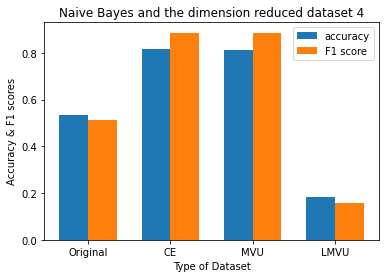

Support Vector Machine


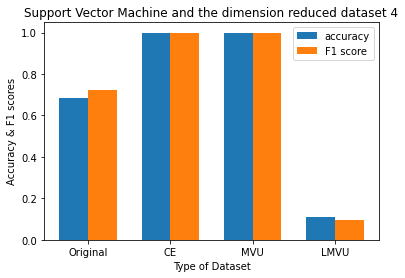

Decision Tree


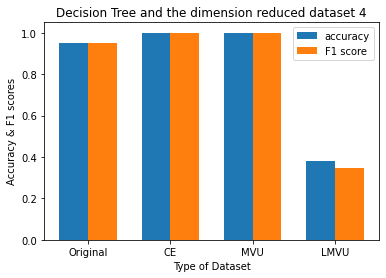

MLP


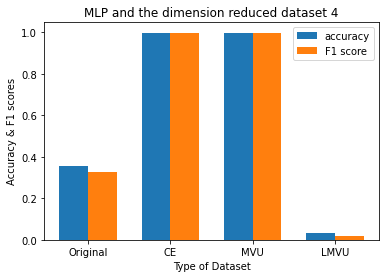

In [3]:
Classifiers=['Naive Bayes','SVM','DT','MLP']
DR=["Original",'CE','MVU','LMVU']
kfold_list=[i for i in range(2,11)]


for i in result:
    print(i)
    acc_dr=[]
    f1_dr=[]
    for j in range(len(result[i])):
        accs=[]
        f1s=[]
        for k in result[i][j]:
            acc,f1=k['Accuracy'],k['f1_score']
            accs.append(acc)
            f1s.append(f1)
        accs=sum(accs)/len(accs)
        f1s=sum(f1s)/len(f1s)
        acc_dr.append(accs)
        f1_dr.append(f1s)
    
    index1=[0,1,2,3]
    index2=[.35,1.35,2.35,3.35]
    bar_width = 0.35
    index3=[.175,1.175,2.175,3.175]

    fig, ax = plt.subplots()
    acc_plot = ax.bar(index1, acc_dr, bar_width,
                    label="accuracy")

    f1_plot = ax.bar(index2, f1_dr,
                    bar_width, label="F1 score")

    ax.set_ylabel('Accuracy & F1 scores')
    ax.set_xlabel('Type of Dataset')
    ax.set_title(i+" and the dimension reduced dataset 4")
    ax.set_xticks(index3)
    ax.set_xticklabels(DR)
    ax.legend()

    plt.savefig(r'D:\Windsor\Fourth semester\Applied Machine learning\Project\Code_Machine_learning\plots\Plot_d4_'+i+'.jpg')
    plt.show()
    
